# Daten:  https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

# Projektidee, Beschreibung:
## Problembeschreibung:
Ein chinesisches Automobilunternehmen, Geely Auto, plant den Eintritt in den US-amerikanischen Markt, indem es dort eine Produktionsstätte errichtet und Autos lokal herstellt, um mit amerikanischen und europäischen Konkurrenten zu konkurrieren. Dazu hat Geely ein Beratungsunternehmen für die Automobilbranche beauftragt, um die Faktoren zu analysieren, die den Preis von Autos beeinflussen. Insbesondere möchten sie verstehen, welche Faktoren den Preis von Autos auf dem amerikanischen Markt bestimmen, da diese sich deutlich vom chinesischen Markt unterscheiden könnten. 

## Das Unternehmen möchte wissen: 
-	Welche Variablen sind signifikant für die Vorhersage des Autopreises? 
-	Wie gut erklären diese Variablen den Preis eines Autos? 

## Vorgegensweise:
### RISP-DM wird angewendet
Basierend auf verschiedenen Marktforschungen hat das Beratungsunternehmen einen umfangreichen Datensatz mit unterschiedlichen Fahrzeugtypen auf dem US-amerikanischen Markt zusammengetragen.
Lösung der Aufgabestellung:
-  Ein Modell soll entwickelt werden, das den Preis von Autos basierend auf den verfügbaren unabhängigen Variablen am besten vorhersagt. Da ein Auto aus verschieden Komponenten besteht, ist es nur sinnvoll, alle Komponenten zusammen zu betrachten und ein Preismodell zu erstellen. 
-  Gleichzeitig kann auch untersucht werden welche einzelnen Faktoren den Preis beeinflussen.
-  Es wird ein Dashboard für Modelltraining durch Auswahl von beteiligten Spaten erstellt. Der Anwender kann selbst die Spalten auswählen und das Modell trinieren und das Ergebnis anzeigen und bewerten.

## Anwendung:
### Das Modell soll dem Management dabei helfen zu verstehen: 
-	Wie sich der Preis je nach Veränderung einzelner Merkmale verändert 
-	Welche Stellschrauben (Design, Strategie etc.) genutzt werden können, um bestimmte Preisniveaus zu erreichen.
-	Zusätzlich ist das Modell ein hilfreiches Werkzeug, um die Preisdynamik in einem neuen Markt wie den USA zu verstehen.
-   Es wird ein Dashboard erstellt. der Anwender kann selbst die einzelnen Parameter auswählen und den Preis abzuschätzen

## Der bereitgestellte Datensatz dient ausschließlich zu Lernzwecken. Ziehen keine Rückschlüsse auf reale Märkte oder tatsächliche Marktbedingungen.  

# Folgende Schritte sind zu unternehmen, um das definierte Ziel zu erreichen
   ### Es werden Arbeitsschritte nach CRISP-DM vorgesehen.
## 1.	 Business Understanding (Aufgabendefinition)
## 2.	Data Understanding (Auswahl der relevanten Datenbestände)
###  2.1 Deskriptive Analyse
###  2.2 Explorative Datenanalyse (EDA)
## 3.	Data Preparation (Datenaufbereitung)
###  3.1. Datenaufbereitung
###  3.2. Umwandlung von kategorischen Daten in numerischen Daten
## 4.	Modeling (ML-Maschinelles Lernen)
###  4.1 Ein lineares Modell mit One-Hot Encoding für kategorische Spalten 
###  4.2 Ein lineares Modell mit ordinal Encoding für kategorische Spalten
###  4.3 Modell mit zusätzlichen Spalten aus quadratischen Werten von numerischen Spalten
###  4.4 Modell mit flexibler Spaltenauswahl durch Dashboard-Anwendung 
## 5.	Evaluation (Bewertung und Interpretation der Ereignisse)
###  5.1 Prädiktive Analyse
###  5.2 Modellbewertung
## 6.	Deployment (Anwendung der Ergebnisse)
###  6.1. Dashoard für Preis-Vorhersage
Business Understanding (Aufgabendefinition)
 ##
     Hier sind einige mögliche Analyseschritte.

    🔎 Datenbereinigung:

        Gibt es fehlende Werte?

        Sind alle Spalten korrekt typisiert?

    📈 Explorative Datenanalyse (EDA):

        Korrelation von Merkmalen mit dem Preis

        Boxplots, Scatterplots, Histogramme

        Einfluss von carbody, enginesize, horsepower, etc.

    🤖 Lineares Regressionsmodell:

        Feature Engineering

        Modelltraining & Evaluation

        Wichtigste Einflussfaktoren identifizieren

    🧠 Fortgeschrittene Modelle (optional):

        Decision Tree, Random Forest, XGBoost etc.

    📊 Visualisierungen:

        Einfluss visueller Variablen auf Preis

        Preisverteilungen nach Marken, Bauform etc.

# 1.Business Understanding (Aufgabendefinition)
## die Aufgabestellung ist analysiert und verstanden. Die Arbeitsschritte und das Ziel sind klar definiert.

## Einlesenvon Daten aus der csv-Datei CarPrice_Assignment.csv
https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

In [117]:
# import packages

import pandas as pd
import numpy as np
import json
import math
import matplotlib
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.pyplot import figure
from datetime import date

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


plt.style.use('seaborn-v0_8-notebook')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None
import seaborn as sns



In [118]:
df = pd.read_csv("CarPrice_Assignment.csv")

# 2. Data Understanding (Auswahl der relevanten Datenbestände)

## 2.1 Deskriptive Analyse

In [119]:
# Ein Überblicküber die Daten
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Über df.info() bekommt man einen ersten Überblick über die Daten: Anzahl der Zeilen, Anzahl der Spalten,  Namen der Spalten, Datentype und NaN-Werte  
#### 1. Es gibt 26 Spalten und 205 Zeilen
#### 2. Es gibt kein NaN Wert
#### 3. doornumber und cylindernumber werden als Object gezeigt. Es soll untersucht werden warum nicht als Zahl dargestellt werden.


In [120]:
#print(df)
#print(df[["cylindernumber", "enginesize","doornumber"]])
#df1=df.sort_values(by='cylindernumber', ascending=True, inplace=False)
#pd.set_option('display.max_rows', None) 
#print(df1.cylindernumber, df1.doornumber )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Check NAN: Ergebnis:keine NaN vorhanden. Die Behandlung von NaN entfällt.

In [121]:
# Prüfen wie viele Nan jeder Spalte gibt: 
# df.isnull().sum()
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Untersuchung von cylindernumber und doornumber: warum haben sie den Type Object
## 1. sie sind zahlen, aber mit Zeichen dargestellt
## 2. Umwandeln in Zahlen für bessere Bearbeitung

In [122]:
df.doornumber.unique()
df.groupby(['doornumber']).count()
df.groupby(['doornumber']).mean(numeric_only=True)
#unv_df.groupby(['year']).mean(numeric_only=True)
#df[df["doornumber"]=="two"].count()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
doornumber,,,,,,,,,,,,,,,,
four,112.965217,0.104348,101.133913,178.388696,66.300000,54.915652,2646.260870,127.669565,3.358261,3.252348,10.766087,99.686957,5020.869565,25.147826,30.530435,13501.152174
two,90.266667,1.766667,95.718889,168.504444,65.406667,52.203333,2439.677778,125.933333,3.293333,3.259333,9.345778,109.777778,5258.333333,25.311111,31.033333,12989.924078


In [123]:
df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [124]:
#
map_list= {'two':2,'three':3,'four':4, 'five':5,'six':6,'eight':8,'twelve':12}

df['cylindernumber'] = df['cylindernumber'].map(map_list).astype(int)
df['doornumber'] = df['doornumber'].map(map_list).astype(int)
print(df.cylindernumber)
print(df.doornumber)

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 205, dtype: int64
0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: doornumber, Length: 205, dtype: int64


In [125]:
# df.describe(): zeigt die wichtigsten statistische Werte
## 1. doornumber und cylindernumber sind jetzt Zahlen
## 2. 
## 3.

In [126]:
df.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [127]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [128]:
# 

In [129]:
# Feature engneering
numerical_columns = ['doornumber','cylindernumber','wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

cols = 5
rows = int(np.ceil(len(numerical_columns) / cols))

fig = make_subplots(rows=rows, cols=cols, subplot_titles=numerical_columns)

for i, feature in enumerate(numerical_columns):
    row = i // cols + 1
    col = i % cols + 1

    fig.add_trace(
    go.Histogram(
        x=df[feature],
        nbinsx=25,
        name=feature,
        marker=dict(
            line=dict(
                color='black',  # Linienfarbe
                width=1         # Liniendicke
            )
        )
    ),
    row=row, col=col
    )


fig.update_layout(
    height=300 * rows,
    width=1400,
    title_text="Histogramme der numerischen Features",
    showlegend=False
)

fig.show()


## Der Preis wird extra dargestellt um mehr Details zu erkennen.
Es ist zu erkennen dass der Preis eine asymetrische Vertelung hat. 
### min.: 5118€
### Max.: 45400€
### mean: 13276€
### midian: 10295€


In [130]:
# Analyse von Preis:

print("-- statistische Werte von Preis --")

print("min.:", df['price'].min())
print("max.:",df['price'].max())
print("mean:",df['price'].mean())
print("median:",df['price'].median())


fig = px.histogram(df, x='price', nbins=40, marginal="rug", title='Distribution of Price', opacity=0.8)

fig.update_layout(
    xaxis_title='Price',
    yaxis_title='Count',
    height=600  # Höhe des Plots
)

fig.update_xaxes(
    tickmode='linear',
    tick0=0,
    dtick=2000
)

fig.show()


-- statistische Werte von Preis --
min.: 5118.0
max.: 45400.0
mean: 13276.710570731706
median: 10295.0


In [131]:
import plotly.express as px
import plotly.subplots as sp

categorical_columns = ['fueltype', 'aspiration', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'fuelsystem']

# Erstelle 3x3 Subplot-Layout (9 Felder, aber wir brauchen nur 7)
fig = sp.make_subplots(rows=3, cols=3, subplot_titles=[col.capitalize() for col in categorical_columns])

row, col = 1, 1
for column in categorical_columns:
    # Erstelle Histogramm (entspricht Countplot in Seaborn)
    fig_hist = px.histogram(df, x=column, color_discrete_sequence=px.colors.qualitative.Bold)
    
    # Füge jede Spur zum Subplot hinzu
    for trace in fig_hist.data:
        fig.add_trace(trace, row=row, col=col)
    
    # Achsenlabels setzen
    fig.update_xaxes(title_text=column.capitalize(), row=row, col=col)
    fig.update_yaxes(title_text="Count", row=row, col=col)
    
    # Nächste Position berechnen
    col += 1
    if col > 3:
        col = 1
        row += 1

# Layout-Anpassung
fig.update_layout(height=900, width=1000, showlegend=False, title_text="Categorical Features Count Plots")

fig.show()


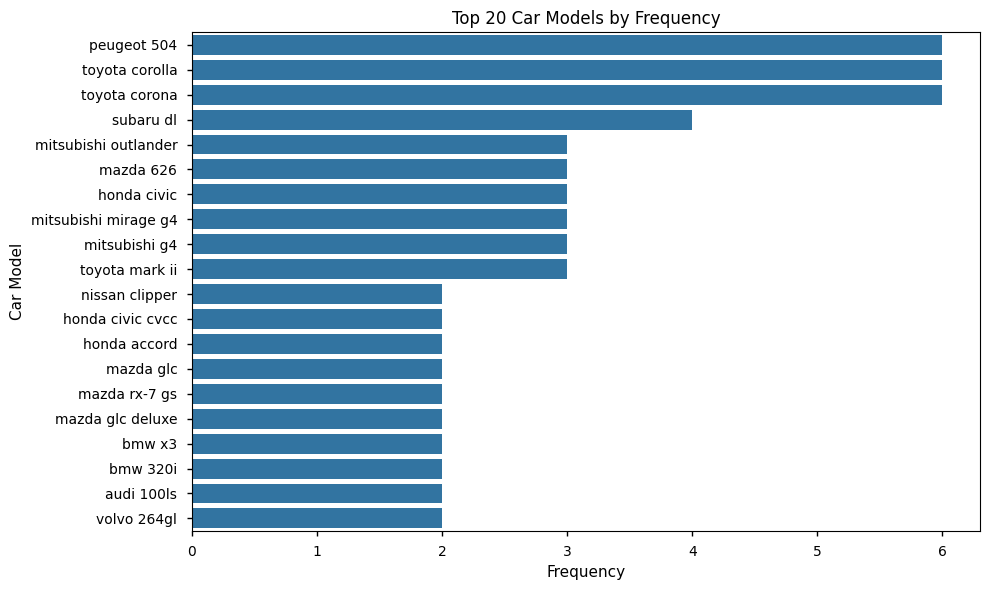

In [132]:
n = 20  # Number of top car models to plot
top_car_models = df['CarName'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

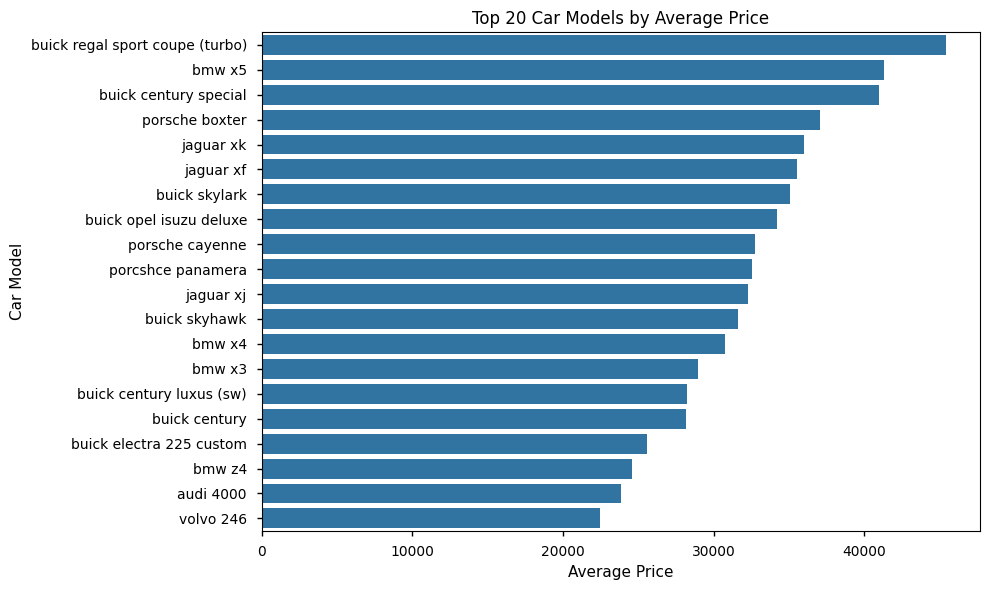

In [133]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('CarName')['price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

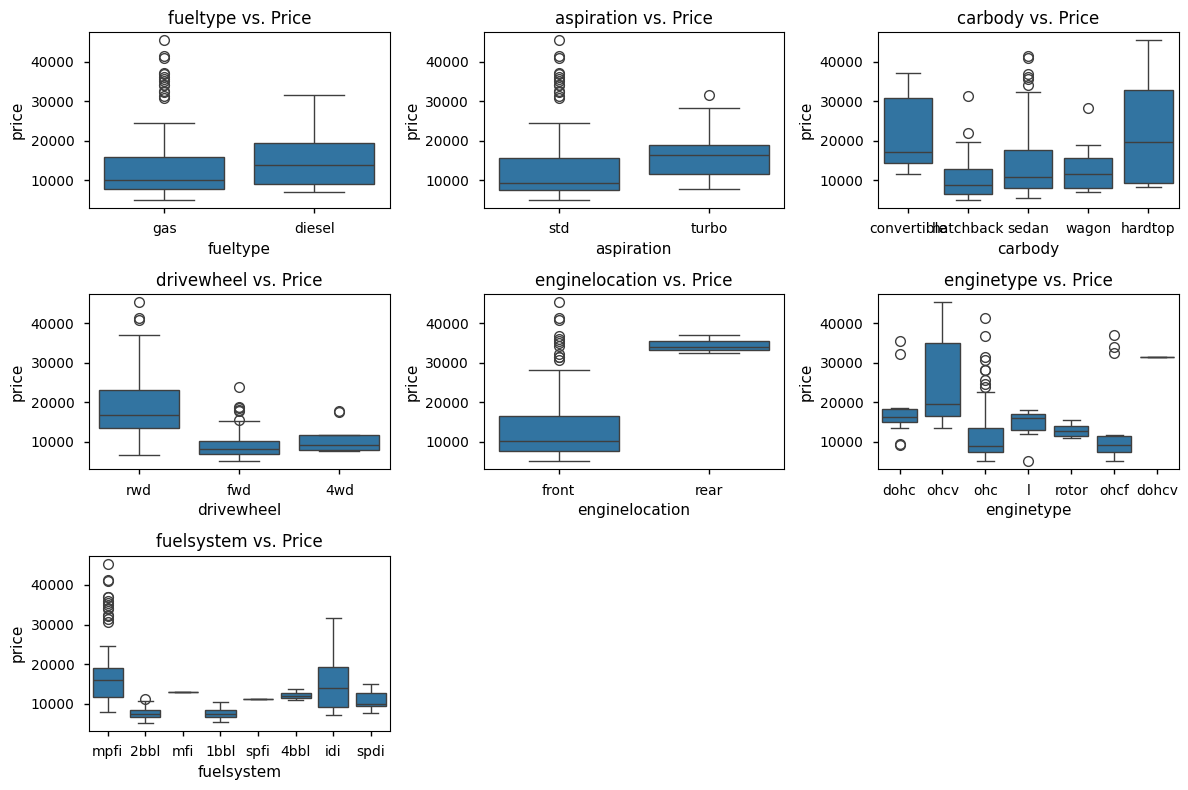

In [134]:
# Categorical Feature vs. Price
plt.figure(figsize=(12, 8))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

In [135]:


numerical_columns = ['doornumber','cylindernumber','wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

single_color = 'blue'  # eine Farbe für alle Plots

fig = make_subplots(
    rows=8, cols=2,
    subplot_titles=[col.capitalize() for col in numerical_columns],
    horizontal_spacing=0.05,  # engerer horizontaler Abstand
    vertical_spacing=0.08
)

row, col = 1, 1
for col_name in numerical_columns:
    counts = df[col_name].value_counts().reset_index()
    counts.columns = [col_name, 'Count']

    fig.add_trace(
        go.Bar(
            x=counts[col_name],
            y=counts['Count'],
            text=counts['Count'],
            textposition='outside',
            marker_color=single_color
         
        ),
        row=row, col=col
    )

    col += 1
    if col > 2:  # nur 2 Spalten
        col = 1
        row += 1

fig.update_layout(
    height=2200, width=1600,  # Höhe und Breite anpassen
    title_text="Count Plots of Numerical Columns",
    showlegend=False
)

fig.show()


## 2.2 Explorative Datenanalyse (EDA)

In [136]:


numerical_columns = ['doornumber','cylindernumber','wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

target = 'price'
# Annahme: df ist dein DataFrame und features_for_scatter deine Liste der Features
# Beispielhafte Berechnung der Achsenbereiche, wie zuvor bestimmt (hier musst du ggf. deine realen Daten nutzen)
features_for_scatter = [f for f in numerical_columns if f != target]
print(features_for_scatter)
feature_ranges = {
    feature: (df[feature].min(), df[feature].max()) for feature in features_for_scatter
}

# Subplot-Layout mit 3 Spalten und entsprechender Zeilenanzahl
num_features = len(features_for_scatter)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

fig = make_subplots(
    rows=num_rows, cols=num_cols,
    subplot_titles=[f"{feat} vs {target}" for feat in features_for_scatter],
    vertical_spacing=0.08  # Weniger Abstand zwischen den Reihen
)

#fig = make_subplots(rows=num_rows, cols=num_cols,subplot_titles=[f"{feat} vs {target}" for feat in features_for_scatter])

for i, feature in enumerate(features_for_scatter):
    row = i // num_cols + 1
    col = i % num_cols + 1
    # 5% Padding links und rechts für x-Achse
    x_min, x_max = feature_ranges[feature]
    x_range_pad = (x_max - x_min) * 0.05
    x_axis_range = [x_min - x_range_pad, x_max + x_range_pad]

    scatter = go.Scatter(x=df[feature], y=df[target], mode='markers', name=feature)
    fig.add_trace(scatter, row=row, col=col)

    # Setze die x-Achse des Subplots mit Range und angemessener Tick-Anzahl
    fig.update_xaxes(range=x_axis_range, row=row, col=col, nticks=5)

    # Label für jede Achse hinzufügen (optional)
    fig.update_xaxes(title_text=feature, row=row, col=col)
    fig.update_yaxes(title_text=target, row=row, col=col)

# Layout anpassen: Grösse, Abstand, Titel
fig.update_layout(height=300*num_rows, width=1300,  # statt 1000 jetzt 1200 für +20%
                  title_text="Scatterplots Features vs. price (3 Spalten Layout)",
                  showlegend=False,
                  margin=dict(l=40, r=40, t=80, b=40))


fig.show()


['doornumber', 'cylindernumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


## Correlation Map of numerical_columns

In [137]:
# correlation map for numerical_columns
correlation_matrix = df[numerical_columns].corr().round(2)
# Heatmap mit Plotly Express
fig = px.imshow(
    correlation_matrix,
    text_auto=True,         # Werte direkt in die Zellen schreiben
    color_continuous_scale='RdBu_r',  # entspricht 'coolwarm'
    title="Correlation Heatmap"
)
fig.update_layout(width=1200, height=1200)
fig.show()

# 3. Data Preparation (Datenaufbereitung)
Für Machine-Learning ist sehr wichtig, eine gute aufbereitete Daten zu haben, um ein allgemein aussagkräftiges Modell zu tranineren.
## 3.1. Datenaufbereitung
citympg und hightwaympg: die Verteilung wird noch mal genau angeschaut. Die Aussereisser werden bereinigt.
## 3.2. Umwandlung von kategorischen Daten in numerischen Daten
Anzahl von Türen und Zylindern sind als kategorische Daten dargestellt. sie werden in Zahlen umgewandelt(schon erledigt in der Deskriptiven Analyse)
## 3.3. Zerlegung von kategorischen Daten in einer Spalten
In der Spalte 'CarName' sind Information über Marke und Modelle zusammengefasst. Sie sollen in zwei Spalten dargestellt werden
## 3.4. Analyse von Ausreißern in citympg und highwaympg

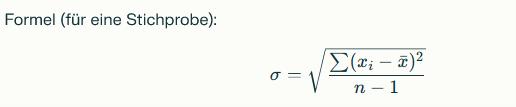


## Statistische Betrachtung:
### Was ist die Standardabweichung (σ oder std)?
Die Standardabweichung misst, wie stark die einzelnen Werte einer Datenmenge im Durchschnitt von deren Mittelwert (Durchschnitt) abweichen.
•	Kleine Standardabweichung → die Werte liegen eng um den Mittelwert herum (geringe Streuung).
•	Große Standardabweichung → die Werte sind weit vom Mittelwert verteilt (hohe Streuung).
💡 Formel (für eine Stichprobe):

wobei
xi = einzelner Wert,
xˉ = Mittelwert,
n = Anzahl der Werte.

### Was bedeutet „3-fache Standardabweichung“?
Wenn die Daten annähernd normalverteilt (Glockenkurve) sind, gilt die sogenannte 68–95–99,7-Regel:
•	±1 σ → ca. 68 % aller Werte liegen innerhalb einer Standardabweichung vom Mittelwert.
•	±2 σ → ca. 95 % aller Werte liegen innerhalb von zwei Standardabweichungen.
•	±3 σ → ca. 99,7 % aller Werte liegen innerhalb von drei Standardabweichungen.
### Das heißt: die Werte außer ±3σ werden beseitigt.
Werte, die mehr als 3 Standardabweichungen vom Mittelwert entfernt sind, treten sehr selten auf (~0,3 % Wahrscheinlichkeit). In der Statistik werden diese oft als Ausreißer betrachtet.



      
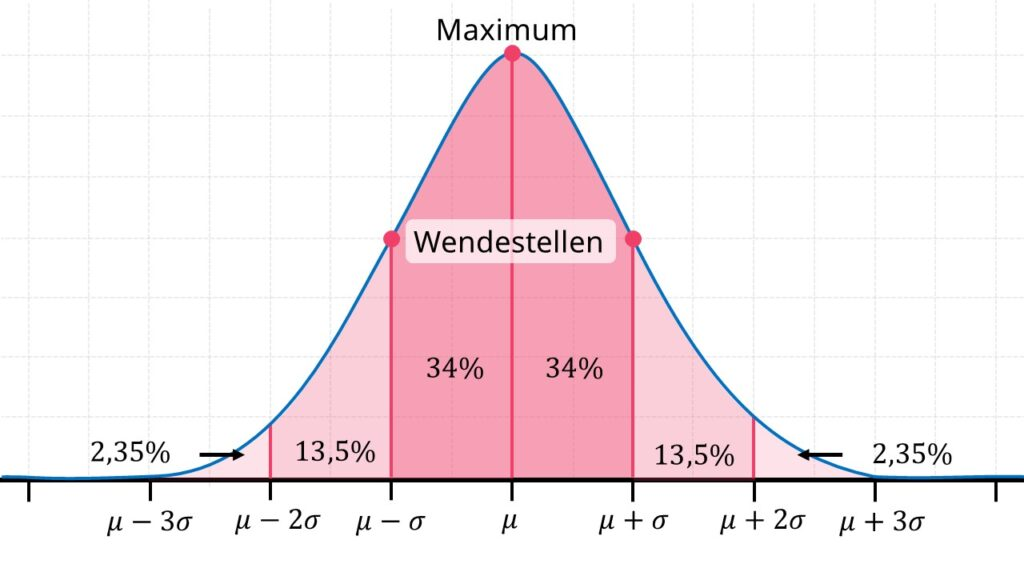

In [138]:
#sns.pairplot(df)

In [139]:
## Analyse von Preis:

In [140]:
# # Analyse von Preis:

print("-- statistische Werte von citympg und highwaympg --")

print("min.:", df['highwaympg'].min())
print("max.:",df['highwaympg'].max())
print("mean:",df['highwaympg'].mean())
print("median:",df['highwaympg'].median())
print("std:",df['highwaympg'].std())
print("6*std:",3*df['highwaympg'].std())


fig = px.histogram(df, x='highwaympg', nbins=40, marginal="rug", title='Distribution of highwaympg', opacity=0.8)

fig.update_layout(
    xaxis_title='highwaympg',
    yaxis_title='Count',
    height=600  # Höhe des Plots
)

fig.update_xaxes(
    tickmode='linear',
    tick0=0,
    dtick=1  # Tick-Beschriftungen alle 2 Einheiten
)

fig.show()

-- statistische Werte von citympg und highwaympg --
min.: 16
max.: 54
mean: 30.75121951219512
median: 30.0
std: 6.886443130941824
6*std: 20.659329392825473


## Löschbedingung von Ausreißern: highwaympg
 ### mean: 30.75121951219512
 ### std:  6.886443130941824
 ### limit_right:  mean+3*std=30.75+3*6.88(20.64)= ca. 52;   Werte > 52 werden gelöscht: nur zwei Werte 53, 54 betroffen
 ### limit_left:   mean-+3*std= 30.75-3*6.88(20.64)= ca. 10; Werte < 10 werden gelöscht: keine Werte betroffen

In [141]:
limit_highwaympg_r=52
limit_highwaympg_l=10


In [142]:
#
split_cols = df['CarName'].str.split(' ', n=1, expand=True)
df['brand'] = split_cols[0]        # erstes Wort
df['model'] = split_cols[1]        # alles nach dem ersten Leerzeichen
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,model
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [144]:
# separate brand and model 
split_cols = df['CarName'].str.split(' ', n=1, expand=True)
# Spalten zuordnen
df['brand'] = split_cols[0]        # erstes Wort
df['model'] = split_cols[1]  
# originale Daten sichern, für weitere Modellevariante
df_cp= df.copy(deep= True)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,model
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


In [145]:
# Define categorical and numerical columns
categorical_columns = ['fueltype', 'aspiration',  'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'fuelsystem', 'brand', 'model']
numerical_columns = ['doornumber','cylindernumber','wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

print(df["fueltype"].unique(), df["aspiration"].unique(),  df["carbody"].unique(), df["drivewheel"].unique(), df["enginelocation"].unique(), 
      df["enginetype"].unique(), df["fuelsystem"].unique())

print(df["enginesize"].unique())

['gas' 'diesel'] ['std' 'turbo'] ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] ['rwd' 'fwd' '4wd'] ['front' 'rear'] ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv'] ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
[130 152 109 136 131 108 164 209  61  90  98 122 156  92  79 110 111 119
 258 326  91  70  80 140 134 183 234 308 304  97 103 120 181 151 194 203
 132 121 146 171 161 141 173 145]


# Machine Learning(ML): 
## Linear model
### Encoding: 
#### 1. categorical colums as one-hot value + numerical columns (standardisiert)  -> Linear model
#### 2. categorical colums as ordinal value ++ numerical columns (standardisiert) -> Linear model
#### 3. categorical as ordinal value

was bedeutet "standardisiert"?

StandardScaler() ist ein Werkzeug aus scikit-learn, das numerische Features standardisiert: Es bringt alle angegebenen Spalten (Features) auf eine gemeinsame Skala, indem jeder Wert so transformiert wird:
z=x−μσ
z=σx−μ

Dabei ist xx der Originalwert, μμ der Mittelwert und σσ die Standardabweichung der jeweiligen Spalte.

fit_transform() berechnet zuerst Mittelwert und Standardabweichung für jede numerische Spalte – und transformiert dann alle Werte entsprechend.

Das Ergebnis: Alle Werte der angegebenen numerischen Spalten haben danach Mittelwert=0 und Standardabweichung=1. Die Skalierung ist jetzt vergleichbar, egal ob z.B. Einkommen, Alter oder Wohnfläche vorher unterschiedlich große Zahlen waren.



## 1. categorical colums as one-hot value + numerical columns (standardisiert) -> Linear model

In [146]:
# modue für ML importieren

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [147]:

df_cp= df.copy(deep= True)
#1. categorical colums as one-hot value + numerical columns (standardisiert) -> Linear model
# ----------------------
# One-Hot-Encoding
# ----------------------
# One-Hot für alle kategorischen Spalten
#df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)  
df_cp = pd.get_dummies(df_cp, columns=categorical_columns, drop_first=True)  
# drop_first=True → vermeidet Dummy Variable Trap

# ----------------------
# Feature Engineering
# ----------------------
df_cp['power_to_weight_ratio'] = df_cp['horsepower'] / df_cp['curbweight']
df_cp['log_enginesize'] = np.log(df_cp['enginesize'] + 1)

#print(df_cp)
# ----------------------
# Feature Scaling (nur numerische Originalspalten, nicht die One-Hot Spalten)
# ----------------------
scaler = StandardScaler()
df_cp[numerical_columns] = scaler.fit_transform(df_cp[numerical_columns])

# ----------------------
# Train-Test-Split
# ----------------------
X = df_cp.drop(['price', 'CarName'], axis=1)
y = df_cp['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------
# Modelltraining
# ----------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ----------------------
# Vorhersagen
# ----------------------
y_pred = model.predict(X_test)

# ----------------------
# Modellbewertung
# ----------------------
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test, y_pred)

print(f"R-squared: {r2_square}")
print(f"Mean Squared Error: {mse}")

# ----------------------
# Vergleich der Vorhersagen
# ----------------------
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test - y_pred,
    'rel%': abs((y_test - y_pred)) / y_test * 100
})

#pred_df


R-squared: 0.6978378968599681
Mean Squared Error: 23853891.379327953


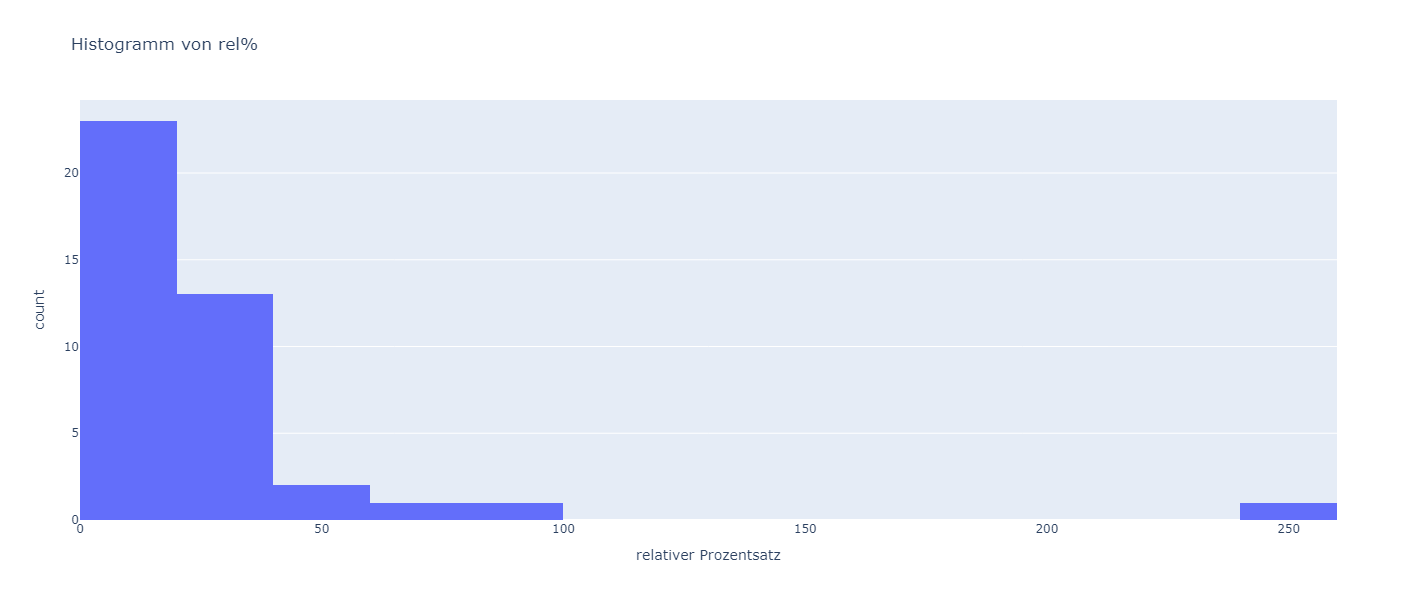

In [148]:

fig = px.histogram(pred_df, x='rel%', nbins=20, height=600,
                   title='Histogramm von rel%',
                   labels={'rel%': 'relativer Prozentsatz'})
fig.show()


## 2. categorical colums as ordinal value + numerical columns (standardisiert) -> Linear model

In [149]:
# get the original data from df:
df_cp= df.copy(deep= True)

# 2. categorical colums as ordinal value ++ numerical columns (standardisiert) -> Linear model
# ----------------------
#  ordinal-Encoding
# ----------------------
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_cp[column] = label_encoder.fit_transform(df_cp[column])
    
# ----------------------
# Feature Engineering
# ----------------------
df_cp['power_to_weight_ratio'] = df_cp['horsepower'] / df_cp['curbweight']

#for column in numerical_columns:
#    df_cp[f'{column}_squared'] = df_cp[column] ** 2

df_cp['log_enginesize'] = np.log(df_cp['enginesize'] + 1)
#print(df_cp)
# ----------------------
# Feature Scaling (nur numerische Originalspalten, nicht die One-Hot Spalten)
# ----------------------
scaler = StandardScaler()
df_cp[numerical_columns] = scaler.fit_transform(df_cp[numerical_columns])

# ----------------------
# Train-Test-Split
# ----------------------
X = df_cp.drop(['price', 'CarName'], axis=1)
y = df_cp['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------
# Modelltraining
# ----------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ----------------------
# Vorhersagen
# ----------------------

y_pred = model.predict(X_test)

# ----------------------
# Modellbewertung
# ----------------------
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test, y_pred)

print(f"R-squared: {r2_square}")
print(f"Mean Squared Error: {mse}")

# ----------------------
# Vergleich der Vorhersagen
# ----------------------
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test - y_pred,
    'rel%': abs((y_test - y_pred)) / y_test * 100
})

#pred_df


R-squared: 0.8728500290005163
Mean Squared Error: 10037729.965431107


In [150]:

fig = px.histogram(pred_df, x='rel%', nbins=20, height=600,
                   title='Histogramm von rel%',
                   labels={'rel%': 'relativer Prozentsatz'})
fig.show()


## 2.1 categorical colums as ordinal value + numerical columns (standardisiert) -> Linear model 
 Aufbereitung von highwaympg: limit_highwaympg_r=52

In [152]:
# get the original data from df:
# df.describe(include=['object', 'category'])
df_cp= df.copy(deep= True)
df_cp.info()
# 2. categorical colums as ordinal value ++ numerical columns (standardisiert) -> Linear model
# ----------------------
#  ordinal-Encoding
# ----------------------
#df_cp= df_cp[ df_cp.loc['highwaympg'] <= limit_highwaympg_r]
# Filter anwenden: highwaympg < limit_highwaympg_r
#df_cp = df_cp[df_cp['highwaympg'] < limit_highwaympg_r].copy()
df_cp= df_cp.loc[df_cp['highwaympg'] < limit_highwaympg_r]

# Prüfen
print(df_cp.shape)
print(df_cp['highwaympg'].max())


df_cp.info()

label_encoder = LabelEncoder()
for column in categorical_columns:
    df_cp[column] = label_encoder.fit_transform(df_cp[column])
    
# ----------------------
# Feature Engineering
# ----------------------
df_cp['power_to_weight_ratio'] = df_cp['horsepower'] / df_cp['curbweight']

#for column in numerical_columns:
#    df_cp[f'{column}_squared'] = df_cp[column] ** 2

df_cp['log_enginesize'] = np.log(df_cp['enginesize'] + 1)
#print(df_cp)
# ----------------------
# Feature Scaling (nur numerische Originalspalten, nicht die One-Hot Spalten)
# ----------------------
scaler = StandardScaler()
df_cp[numerical_columns] = scaler.fit_transform(df_cp[numerical_columns])

# ----------------------
# Train-Test-Split
# ----------------------
X = df_cp.drop(['price', 'CarName'], axis=1)
y = df_cp['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------
# Modelltraining
# ----------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ----------------------
# Vorhersagen
# ----------------------

y_pred = model.predict(X_test)

# ----------------------
# Modellbewertung
# ----------------------
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test, y_pred)

print(f"R-squared: {r2_square}")
print(f"Mean Squared Error: {mse}")

# ----------------------
# Vergleich der Vorhersagen
# ----------------------
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test - y_pred,
    'rel%': abs((y_test - y_pred)) / y_test * 100
})

#pred_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

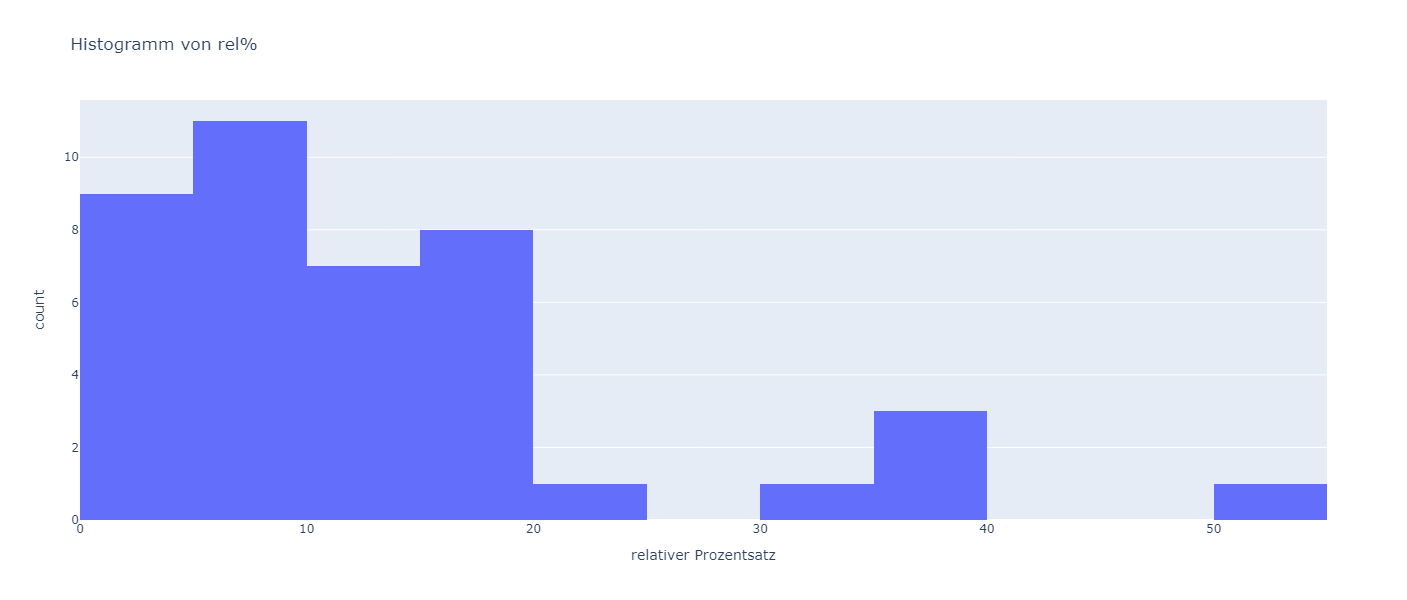

In [153]:

fig = px.histogram(pred_df, x='rel%', nbins=20, height=600,
                   title='Histogramm von rel%',
                   labels={'rel%': 'relativer Prozentsatz'})
fig.show()


## 3. categorical colums as ordinal value + numerical columns (standardisiert) + additional columns -> not Linear model¶
    additional columns: are calculated by squared value of numerical columns: y= x^2/2

In [ ]:
# get the original data from df:
df_cp= df.copy(deep= True)

# 2. categorical colums as ordinal value ++ numerical columns (standardisiert) -> Linear model
# ----------------------
#  ordinal-Encoding
# ----------------------
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_cp[column] = label_encoder.fit_transform(df_cp[column])
    
# ----------------------
# Feature Engineering
# ----------------------
df_cp['power_to_weight_ratio'] = df_cp['horsepower'] / df_cp['curbweight']
num_cols = len(numerical_columns)
for column in numerical_columns:
    df_cp[f'{column}_squared'] = (df_cp[column] ** 2)/30

print("cols_num=", num_cols)
df_cp['log_enginesize'] = np.log(df_cp['enginesize'] + 1)
#print(df_cp)
# ----------------------
# Feature Scaling (nur numerische Originalspalten, nicht die One-Hot Spalten)
# ----------------------
scaler = StandardScaler()
df_cp[numerical_columns] = scaler.fit_transform(df_cp[numerical_columns])

# ----------------------
# Train-Test-Split
# ----------------------
X = df_cp.drop(['price', 'CarName'], axis=1)
y = df_cp['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------
# Modelltraining
# ----------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ----------------------
# Vorhersagen
# ----------------------
y_pred = model.predict(X_test)

# ----------------------
# Modellbewertung
# ----------------------
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test, y_pred)

print(f"R-squared: {r2_square}")
print(f"Mean Squared Error: {mse}")

# ----------------------
# Vergleich der Vorhersagen
# ----------------------
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test - y_pred,
    'rel%': abs((y_test - y_pred)) / y_test * 100
})

#pred_df

## 4. categorical colums as ordinal value + numerical columns (standardisiert)  Linear model¶
### drop citympg or highwaympg: the two values are strong correlated. using one is enough

In [ ]:
# get the original data from df:
df_cp= df.copy(deep= True)

# 2. categorical colums as ordinal value ++ numerical columns (standardisiert) -> Linear model
# ----------------------
#  ordinal-Encoding
# ----------------------
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_cp[column] = label_encoder.fit_transform(df_cp[column])
    
# ----------------------
# Feature Engineering
# ----------------------
df_cp['power_to_weight_ratio'] = df_cp['horsepower'] / df_cp['curbweight']
#num_cols = len(numerical_columns)
#for column in numerical_columns:
#    df_cp[f'{column}_squared'] = (df_cp[column] ** 2)/30

df_cp['log_enginesize'] = np.log(df_cp['enginesize'] + 1)
df_cp['horsepw_squared'] = (df_cp['horsepower'] **2)
df_cp['compressionratio_squared'] = (df_cp['compressionratio'] **2)



#add a new column: avgmpg
# df_cp['avgmpg'] = (df_cp['citympg'] + df_cp['highwaympg'])/2
# numerical_columns.append('avgmpg')

#print(numerical_columns)
# ----------------------
# Feature Scaling (nur numerische Originalspalten, nicht die One-Hot Spalten)
# ----------------------




scaler = StandardScaler()
df_cp[numerical_columns] = scaler.fit_transform(df_cp[numerical_columns])

# ----------------------
# Train-Test-Split
# ----------------------


# X = df_cp.drop(['price', 'CarName', 'citympg', 'highwaympg'], axis=1)
X = df_cp.drop(['price', 'CarName'], axis=1)

print("---x:---\n", X.columns)
y = df_cp['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------
# Modelltraining
# ----------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ----------------------
# Vorhersagen
# ----------------------
y_pred = model.predict(X_test)

# ----------------------
# Modellbewertung
# ----------------------
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test, y_pred)

print(f"R-squared: {r2_square}")
print(f"Mean Squared Error: {mse}")

# ----------------------
# Vergleich der Vorhersagen
# ----------------------
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test - y_pred,
    'rel%': abs((y_test - y_pred)) / y_test * 100
})


In [ ]:
# Encoding categorical variables with one-hot verfahren
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Feature engineering
df['power_to_weight_ratio'] = df['horsepower'] / df['curbweight']
for column in numerical_columns:
    df[f'{column}_squared'] = df[column] ** 2
df['log_enginesize'] = np.log(df['enginesize'] + 1)

# Feature scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
#print(df["enginesize"].unique())
# Splitting the dataset
X = df.drop(['price', 'CarName'], axis=1)  # Include the engineered features and CarName
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred, 'rel%': abs((y_test-y_pred))/y_test*100})
pred_df





In [ ]:
#sns.histplot(data=pred_df['rel%'], bins=10, kde=True)


#import plotly.express as px

fig = px.histogram(pred_df, x='rel%', nbins=20, height=600,
                   title='Histogramm von rel%',
                   labels={'rel%': 'relativer Prozentsatz'})
fig.show()



In [ ]:

# Encoding categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Feature engineering
df['power_to_weight_ratio'] = df['horsepower'] / df['curbweight']
for column in numerical_columns:
    df[f'{column}_squared'] = df[column] ** 2
df['log_enginesize'] = np.log(df['enginesize'] + 1)

# Feature scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
#print(df["enginesize"].unique())


In [ ]:
# Splitting the dataset
X = df.drop(['price', 'CarName'], axis=1)  # Include the engineered features and CarName
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred, 'rel%': abs((y_test-y_pred))/y_test*100})
pred_df



In [ ]:
 #sns.histplot(data=pred_df['rel%'], bins=10, kde=True)


#import plotly.express as px

fig = px.histogram(pred_df, x='rel%', nbins=20, height=600,
                   title='Histogramm von rel%',
                   labels={'rel%': 'relativer Prozentsatz'})
fig.show()

